In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
import scipy.stats as st

In [3]:
'''########################################## STEP > 1. Loading and understanding the datasets #################################################'''

'########################################## STEP > 1. Loading and understanding the datasets #################################################'

In [4]:
# EXPLORING CLIENT PROFILE DATASET

df_final_demo = pd.read_csv('df_final_demo.txt', delimiter = ",")
df_final_demo.head(4)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0


In [5]:
# LOADING AND CONCATING DIGITAL FOOTPRINT DATASET

df_21 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter = ",")
df_22 = pd.read_csv('df_final_web_data_pt_2.txt', delimiter = ",")
df_final_web_data = pd.concat([df_21,df_22], axis = 0)
df_final_web_data.head(4)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13


In [6]:
# LOADING EXPERIMENT ROSTER DATASET

df_final_experiment_clients = pd.read_csv('df_final_experiment_clients.txt', delimiter = ",")
df_final_experiment_clients.head(4)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test


In [7]:
'''########################################## STEP > 2. Data cleaning #################################################'''

'########################################## STEP > 2. Data cleaning #################################################'

In [8]:
#first df cleaning.........................

In [9]:
df_final_demo.shape                                         #checking row and column number

(70609, 9)

In [10]:
df_1 = df_final_demo.dropna(how='any')                       #dropping null values
df_1.shape

(70594, 9)

In [11]:
df_1.duplicated().value_counts()                             #checking duplicated 

False    70594
Name: count, dtype: int64

In [12]:
df_1.columns                                                 #checking column names

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [13]:
df_1.rename(columns={'clnt_tenure_yr' : 'client_tenure_yr',
                     'clnt_tenure_mnth' : 'client_tenure_mnth',
                     'clnt_age' : 'client_age', 
                     'gendr': 'gender',
                     'bal': 'balance'},
                     inplace = True)
df_1.columns                                                 #fixing column names

C:\Users\Amira\AppData\Local\Temp\ipykernel_14344\2671138120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns={'clnt_tenure_yr' : 'client_tenure_yr',


Index(['client_id', 'client_tenure_yr', 'client_tenure_mnth', 'client_age',
       'gender', 'num_accts', 'balance', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [14]:
df_1["gender"].unique()                                   #checking gender column

array(['U', 'M', 'F', 'X'], dtype=object)

In [15]:
mapping = {
    'U': 'Unknown',
    'M': 'Male',
    'F': 'Female',
    'X': 'Unknown',
}
df_1['gender'] = df_1['gender'].replace(mapping)        #renaming the gender 
df_1['gender'].unique()

C:\Users\Amira\AppData\Local\Temp\ipykernel_14344\899688171.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['gender'] = df_1['gender'].replace(mapping)        #renaming the gender


array(['Unknown', 'Male', 'Female'], dtype=object)

In [16]:
#second df cleaning...............

In [17]:
df_final_web_data.shape                                         #checking row and column number

(755405, 5)

In [18]:
df_2 = df_final_web_data.dropna(how='any')                       #dropping null values
df_2.shape

(755405, 5)

In [19]:
df_2.duplicated().value_counts()                                 #checking duplicated 

False    744641
True      10764
Name: count, dtype: int64

In [20]:
df_2 = df_2.drop_duplicates()                                    #dropping duplicates
df_2.shape

(744641, 5)

In [21]:
#third df cleaning....................

In [22]:
df_final_experiment_clients.shape                                #checking row and column number

(70609, 2)

In [23]:
df_3 = df_final_experiment_clients.dropna(how='any')               #dropping null values 
df_3.shape

(50500, 2)

In [24]:
df_3.duplicated().value_counts()                                 #checking duplicated 

False    50500
Name: count, dtype: int64

In [25]:
df_3.columns                                                   #checking column name

Index(['client_id', 'Variation'], dtype='object')

In [26]:
df_3.rename(columns={'Variation':'groups'}, inplace=True)      #changing the column name from variation to 'groups'

C:\Users\Amira\AppData\Local\Temp\ipykernel_14344\2785851822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.rename(columns={'Variation':'groups'}, inplace=True)      #changing the column name from variation to 'groups'


In [27]:
############################ CLEANING DONE ################################

In [28]:
'''########################################## STEP 3.1 > Analysing the completion rate #################################################'''

'########################################## STEP 3.1 > Analysing the completion rate #################################################'

In [29]:
df_client_activity = pd.merge(df_2, df_3, on="client_id")     # merging df_2 with df_3 to define test and contol group users
df_client_activity.shape

(317235, 6)

In [30]:
df_test = df_client_activity[df_client_activity["groups"]=="Test"]          # separating "Test" & "Control" group users on two df
df_control = df_client_activity[df_client_activity["groups"]=="Control"]

print(df_test.shape)
print(df_control.shape)

(176699, 6)
(140536, 6)


In [31]:
# separating user from "Test" & "Control" group user who reach the confirm stage
# and counting as well how many users reach the final stage

df_test_confirm = df_test.loc[(df_test.process_step == "confirm")]["process_step"].count()
df_control_confirm = df_control.loc[(df_control.process_step == "confirm")]["process_step"].count()

test_total_users = df_test['process_step'].count()
control_total_users = df_control['process_step'].count()

# Calculating the completion rate for both group
test_completion_rate = df_test_confirm / test_total_users
control_completion_rate = df_control_confirm / control_total_users

print(f"Test group users completion rate: {test_completion_rate:.2%}")
print(f"Control group users completion rate: {control_completion_rate:.2%}")

Test group users completion rate: 14.49%
Control group users completion rate: 12.34%


In [32]:
#first hypoooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo THESIS...............


#h0 = between test and control group the completion rate difference is more than 5% 
#h1 = completion rate difference is not more than 5% 

successes = [df_test_confirm, df_control_confirm]
nobs = [test_total_users, control_total_users]
z_stat, p_val = proportions_ztest(successes, nobs)
print(f'Z-statistic: {z_stat:.4f}')
print(f'P-value: {p_val:.4f}')
print(f'P-value: {p_val:}')
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference between the completion rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the completion rates.")

Z-statistic: 17.6027
P-value: 0.0000
P-value: 2.3502234547775717e-69
Reject the null hypothesis: There is a significant difference between the completion rates.


In [33]:
'''################################## STEP 3.2 > Analyzing the ERROR rate for the TEST & CONTROL GROUP USER ###############################'''

'################################## STEP 3.2 > Analyzing the ERROR rate for the TEST & CONTROL GROUP USER ###############################'

In [34]:
# renaming the value for the process_steps column  for test group
mapping = {
    'start': 'step_0',
    'step_1': 'step_1',
    'step_2': 'step_2',
    'step_3': 'step_3',
    'confirm': 'step_4'
}
df_test['process_step'] = df_test['process_step'].replace(mapping)


#defining the previous step on a new column
df_test["prev_step"] = df_test.groupby(['visitor_id', 'visit_id'])['process_step'].shift(-1)

#if process_step column is smaller than prev_step column it will genarate True/false

test_error_rate = (df_test["process_step"] < df_test["prev_step"])
df_test["error"] = test_error_rate

# as we know for boolean data type true = 1 and false = 0 
# we can use the mean function to find out the avarage error rate for test group users
test_group_error_rate = test_error_rate.mean().round(4)


'''################'''

# we will follow exactly the same steps that we did for test group
mapping = {
    'start': 'step_0',
    'step_1': 'step_1',
    'step_2': 'step_2',
    'step_3': 'step_3',
    'confirm': 'step_4'
}
df_control['process_step'] = df_control['process_step'].replace(mapping)

df_control["prev_step"] = df_control.groupby(['visitor_id', 'visit_id'])['process_step'].shift(-1)

control_error_rate = (df_control["process_step"] < df_control["prev_step"])
df_control["error"] = control_error_rate
control_group_erro_rate = control_error_rate.mean().round(4)

C:\Users\Amira\AppData\Local\Temp\ipykernel_14344\1055979950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['process_step'] = df_test['process_step'].replace(mapping)
C:\Users\Amira\AppData\Local\Temp\ipykernel_14344\1055979950.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["prev_step"] = df_test.groupby(['visitor_id', 'visit_id'])['process_step'].shift(-1)
C:\Users\Amira\AppData\Local\Temp\ipykernel_14344\1055979950.py:18: SettingWithCopyWarning: 
A value is trying to be set on a

In [35]:
df_test.head(5)

,client_id,visitor_id,visit_id,process_step,date_time,groups,prev_step,error
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,step_2,False
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,step_3,True
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,step_2,False
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,step_3,True
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,step_2,False


In [36]:
print(f"Error rate for the 'Test' user groups process step {test_group_error_rate:.2%}")
print(f"Error rate for the 'control' user groups process step {control_group_erro_rate:.2%}")

Error rate for the 'Test' user groups process step 9.53%
Error rate for the 'control' user groups process step 7.22%


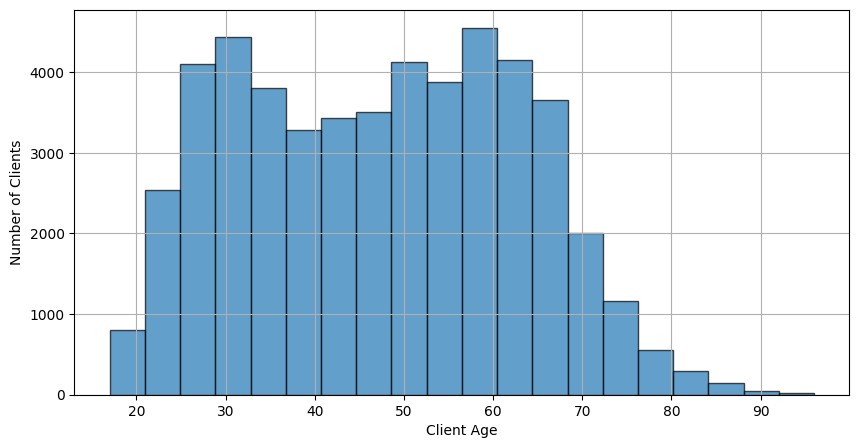

In [48]:
plt.figure(figsize = (10,5))
plt.hist(df_1["client_age"], bins = 20, edgecolor ="k", alpha = 0.7) # alpha stands for transparency
plt.xlabel("Client Age")
plt.ylabel("Number of Clients")
plt.grid(True, which = "both")
plt.show()

'Test Group'

col_0,count
process_step,
step_0,55773
step_1,38666
step_2,30899
step_3,25761
step_4,25600


'Control Group'

col_0,count
process_step,
step_0,45380
step_1,29544
step_2,25773
step_3,22503
step_4,17336


C:\Users\Amira\AppData\Local\Temp\ipykernel_14344\1131083871.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= test_table.index, y = test_table["count"], palette = "Set3", ).set(title="User from Test Group")


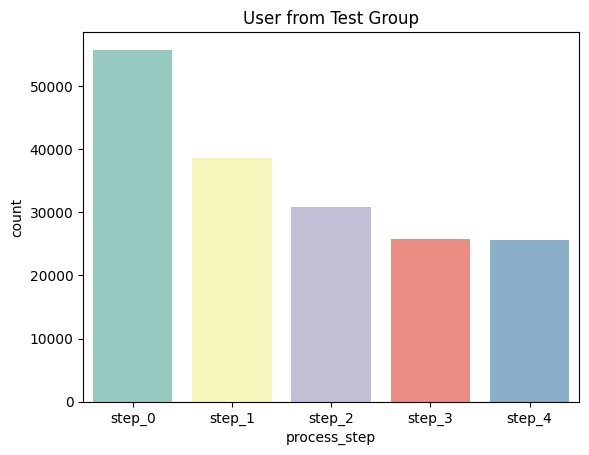

C:\Users\Amira\AppData\Local\Temp\ipykernel_14344\1131083871.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= control_table.index, y = control_table["count"], palette = "Set3").set(title="User from Control Group")


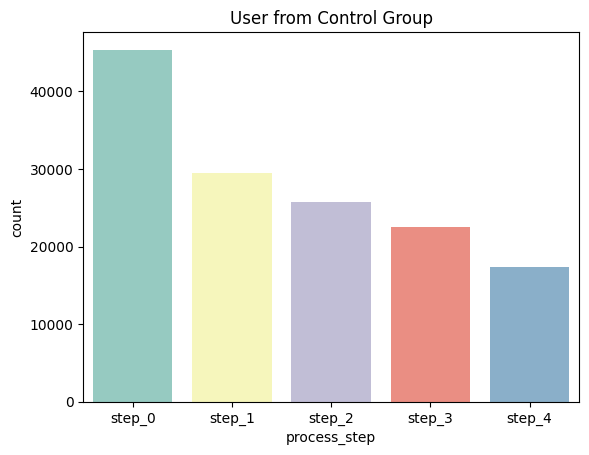

In [37]:
# UNIVARIATE ANALYSIS ON CATEGORICAL VARIABLE 'process_step'
df_test["process_step"].value_counts(normalize=True)

test_table = pd.crosstab(index = df_test["process_step"],
                       columns = "count")
display("Test Group",test_table)

control_table = pd.crosstab(index = df_control["process_step"],
                       columns = "count")
display("Control Group",control_table)

sns.barplot(x= test_table.index, y = test_table["count"], palette = "Set3", ).set(title="User from Test Group")
plt.show()

sns.barplot(x= control_table.index, y = control_table["count"], palette = "Set3").set(title="User from Control Group")
plt.savefig("plt.png", dpi = 720)
plt.show()

In [38]:
'''############################## STEP 3.3 > Analyzing the time spent on each step for the TEST & CONTROL GROUP USER ###########################'''

'############################## STEP 3.3 > Analyzing the time spent on each step for the TEST & CONTROL GROUP USER ###########################'

In [39]:
#first thing converting to date time
df_test["date_time"] = pd.to_datetime(df_test["date_time"])
df_control["date_time"] = pd.to_datetime(df_control["date_time"])

#sort them on visit_id and date_time
df_test_sorted = df_test.sort_values(by=["visit_id","date_time"])
df_control_sorted = df_control.sort_values(by=["visit_id","date_time"])

#calculate the time spent / difference between one step to another
df_test_sorted["time_spent"] = df_test_sorted.groupby("visit_id")["date_time"].diff()
df_control_sorted["time_spent"] = df_control_sorted.groupby("visit_id")["date_time"].diff()


df_test_sorted["duration"] = df_test_sorted.groupby("visit_id")["date_time"].diff().dt.total_seconds()
df_control_sorted["duration"] = df_control_sorted.groupby("visit_id")["date_time"].diff().dt.total_seconds()

# dropping the 'NaT' for further analyse
test_valid_steps = df_test_sorted[df_test_sorted["time_spent"].notna()]
control_valid_steps = df_control_sorted[df_control_sorted["time_spent"].notna()]

# finding avg time difference for each step
test_group_average_duration = test_valid_steps.groupby("process_step")["time_spent"].mean()
control_group_average_duration = control_valid_steps.groupby("process_step")["time_spent"].mean()

# convert the timedelta to total seconds and round the values
test_group_average_duration_in_seconds = test_group_average_duration.dt.total_seconds().round().astype(int)
control_group_average_duration_in_seconds = control_group_average_duration.dt.total_seconds().round().astype(int)

C:\Users\Amira\AppData\Local\Temp\ipykernel_14344\3765999776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["date_time"] = pd.to_datetime(df_test["date_time"])
C:\Users\Amira\AppData\Local\Temp\ipykernel_14344\3765999776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control["date_time"] = pd.to_datetime(df_control["date_time"])


In [40]:
df_test_sorted.head(5)

,client_id,visitor_id,visit_id,process_step,date_time,groups,prev_step,error,time_spent,duration
106314,3561384,451664975_1722933822,100012776_37918976071_457913,step_4,2017-04-26 13:22:17,Test,NaN,False,NaT,NaN
106313,3561384,451664975_1722933822,100012776_37918976071_457913,step_4,2017-04-26 13:23:09,Test,step_4,False,0 days 00:00:52,52.0
235345,7338123,612065484_94198474375,100019538_17884295066_43909,step_0,2017-04-09 16:20:56,Test,NaN,False,NaT,NaN
235344,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,step_0,False,0 days 00:00:16,16.0
235343,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,step_1,False,0 days 00:00:09,9.0


In [41]:
test_group_duration = df_test_sorted["duration"].mean()
control_group_duration = df_control_sorted["duration"].mean()

print(f"Average duration for test group user: {test_group_duration}")
print(f"Average duration for control group user: {control_group_duration}")

print("Average time difference to move each step among Test Group User:")
print(test_group_average_duration_in_seconds)
print("Average time difference to move each step among Control Group User:")
print(control_group_average_duration_in_seconds)

control_group_duration = control_group_average_duration_in_seconds.mean()
print(f"To move from one process step to another Control group user on average take {control_group_duration} seconds ")
test_group_duration = test_group_average_duration_in_seconds.mean()
print(f"To move from one process step to another Test group user on average take {test_group_duration} seconds ")

Average duration for test group user: 84.29069309200862
Average duration for control group user: 83.66142117455952
Average time difference to move each step among Test Group User:
process_step
step_0    152
step_1     38
step_2     48
step_3     97
step_4    130
Name: time_spent, dtype: int32
Average time difference to move each step among Control Group User:
process_step
step_0    175
step_1     43
step_2     39
step_3     94
step_4    130
Name: time_spent, dtype: int32
To move from one process step to another Control group user on average take 96.2 seconds 
To move from one process step to another Test group user on average take 93.0 seconds 


In [42]:
#2nd hypoooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo THESIS...............

In [43]:
test_durations = df_test_sorted['duration'].dropna()
control_durations = df_control_sorted['duration'].dropna()


t_stat, p_value = ttest_ind(test_durations, control_durations)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.7255
P-value: 0.4681


In [44]:
# H0: Average duration in each step for test group  = Average duration in each step for control group
# H1: Average duration in each step for test group  != Average duration in each step for control group

#significance level = 0.05
alpha = 0.05
p_value = st.ttest_ind(test_durations, control_durations, equal_var = False)[1]

if alpha > p_value:
  print("We can reject the null", p_value)
else:
  print("We cannot reject the null", p_value)

We cannot reject the null 0.47545470538507695


In [45]:
##################################'''''''''''''Initializing Tableau Preparation''''''''''''''''''#############################
df_4 = pd.concat([df_test_sorted,df_control_sorted], axis = 0)
df_1 = pd.merge(df_1, df_3, on="client_id")

In [46]:
#converting dataframe to excel file for tableau

df_1.to_csv("van_guard_client_DETAIL.csv")
df_4.to_csv("van_guard_client_ACTIVITY.csv")